In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

from pathlib import Path
data_dir = Path('../input/images')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I am trying to get case of Animalies. 

- Measurement or input error.
- Data corruption.
- True outlier observation.


An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. It is also called anomalies.¶

Outlier can be of two types:
1) Univariate
2) Multivariate.

Univariate outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

What is the impact of Outliers on a dataset?

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

#### Outlier Detection Techniques:

##### A) Univariate Outliers:

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the data frame.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis due to high mean Value. I'll plot a simple box plot which is the best visualization for detecting outliers.

<AxesSubplot:ylabel='chol'>

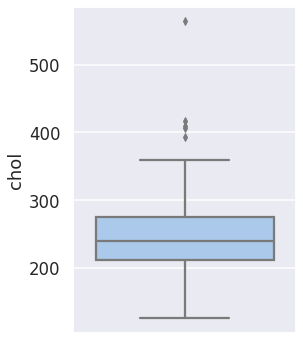

In [5]:
plt.figure(figsize= (4,6))
sns.boxplot(y=df['chol'])

<AxesSubplot:ylabel='trestbps'>

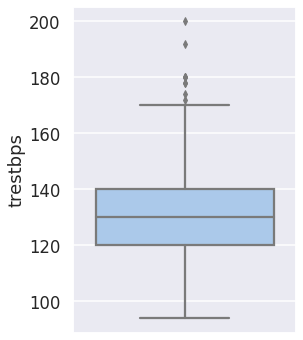

In [6]:
plt.figure(figsize= (4,6))
sns.boxplot(y=df['trestbps'])

<AxesSubplot:ylabel='thalach'>

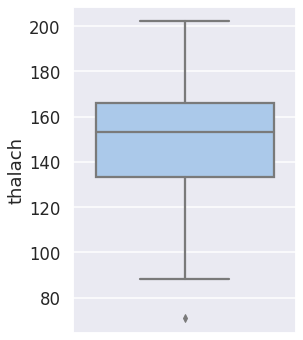

In [7]:
plt.figure(figsize= (4,6))
sns.boxplot(y=df['thalach'])

In tutorial there is just ploting about chol. But in description I observe two more outleir column. So just trying to furture understanding and further practice. 

### 1) Interquartile Range Method

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

In [8]:
def out_iqr(df , column):
    global lower, upper 
    q25, q75 = np.quantile(df[column] , 0.25), np.quantile(df[column], 0.75)
    # Calculate IQR
    iqr = q75 - q25
    # calculate the out
    cut_off = iqr * 1.5 
    # calculate the lower and upper bound value 
    lower , upper = q25 - cut_off , q75 + cut_off
    print('IQR is:', iqr)
    print('Lower bound value is', lower)
    print('Upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively 
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total numbers of outliers are', df1.shape[0] + df2.shape[0])

In [9]:
 out_iqr(df,'chol')

IQR is: 63.5
Lower bound value is 115.75
Upper bound value is 369.75
Total numbers of outliers are 5


In [10]:
# out_iqr(df, 'trestbps')

In [11]:
# out_iqr(df, 'thalach')

### Visual representation

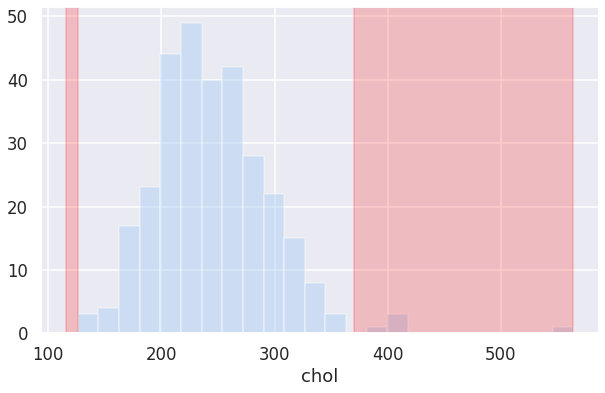

In [12]:
plt.figure(figsize = (10, 6))
sns.distplot(df['chol'], kde=False)
plt.axvspan(xmin= lower, xmax=df['chol'].min(), alpha= 0.2, color='red')
plt.axvspan(xmin=upper , xmax=df['chol'].max(), alpha= 0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

Remedial Measure:

Remove the records which are above the upper bound value and records below the lower bound value!

In [14]:
#Data Frame without outliers
df_new = df[(df['chol'] < upper) | (df['chol'] > lower)]

### 2) Standard Deviation Method

Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

In [15]:
df_s = pd.read_csv('StudentsPerformance.csv')
df_s.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df_s.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Let's consider the "writing score" for inspection. I'll plot a simple density plot which is also one of the best visualization for detecting outliers

<AxesSubplot:xlabel='writing score', ylabel='Density'>

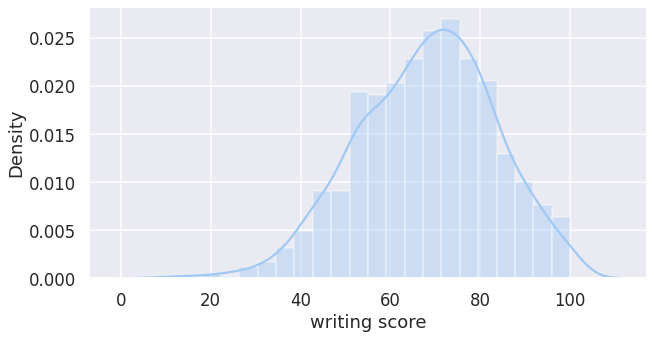

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(df_s['writing score'])

By the looks of it, it is left tailed and it surely has outliers.

In [20]:
def out_std(df, column):
    global lower , upper
    # calculate the mean and standard deviation of the data frame
    data_mean , data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value 
    cut_off = data_std * 3 
    # calculate the lower and upper bound value 
    lower , upper = data_mean - cut_off , data_mean + cut_off
    print('Lower bound value ', lower)
    print('Upper bound value ', upper)
    # Calculate the number of records below and above lower and above bound respectively 
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are :', df1.shape[0] + df2.shape[0])

In [21]:
out_std(df_s, 'writing score')

Lower bound value  22.46702896739105
Upper bound value  113.64097103260895
Total number of outliers are : 4


So as per the SD method, there are 4 ouliters

##### Visual Representation:

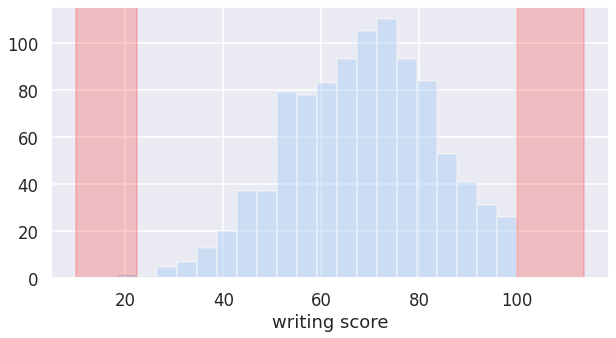

In [22]:
plt.figure(figsize= (10,5))
sns.distplot(df_s['writing score'], kde= False)
plt.axvspan(xmin= lower, xmax= df_s['writing score'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=df_s['writing score'].max(), alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

Remedial Measure:
    
Remove the records which are above the upper bound value and records below the lower bound value!

In [24]:
#Data Frame without outliers
df_new = df_s[(df_s['writing score'] < upper) | (df_s['writing score'] > lower)]

### 3) Z-Score method:

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

This technique assumes a Gaussian distribution of the data. The outliers are the data points that are in the tails of the distribution and therefore far from the mean. How far depends on a set threshold zthr for the normalized data points zi calculated with the formula:

Z_score= (Xi - mean) / standard deviation

where Xi is a data point, 'mean' is the mean of all X and 'standard deviation' the standard deviation of all X.

An outlier is then a normalized data point which has an absolute value greater than Zthr. That is:

|Z_score| > Zthr

Commonly used Zthr values are 2.5, 3.0 and 3.5. Here we will be using 3.0

In [25]:
df_z = pd.read_csv('insurance.csv')
df_z.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [26]:
df_z.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [27]:
df_z.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Let's consider the "charges" for inspection. I'll plot a simple density plot which is one of the best visualization for detecting outliers

<AxesSubplot:xlabel='expenses', ylabel='Density'>

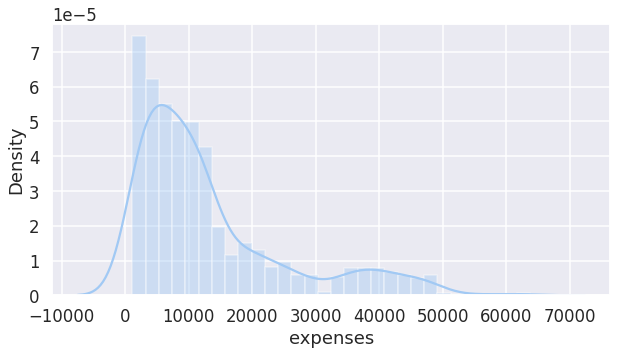

In [29]:
plt.figure (figsize=(10,5))
sns.distplot(df_z['expenses'])

By the looks of it, it is right tailed and it surely has outliers.

Let's define a function to find out the lower and the upper whisker using Z-Score method:

In [36]:
def out_zscore(data):
    global outliers, zscore
    outlier = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data :
        z_score = (i -mean) / std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return print('Total number of outliers are :', len(outlier))

In [37]:
out_zscore(df_z['expenses'])

Total number of outliers are : 7


According to z-score method, it has 7 outliers

#### Visual Representation:

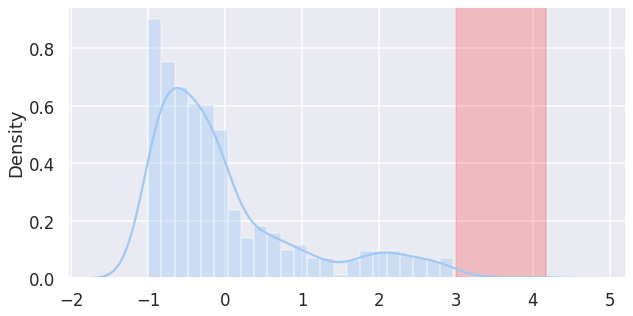

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(zscore)
plt.axvspan(xmin= 3, xmax= max(zscore), alpha = 0.2, color = 'red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

Remedial Measure:
    
Remove the records which are above the upper bound value and records below the lower bound value!

In [41]:
# data fram without outlier 
df_znew = df_z [(df_z['expenses'] < 3) | (df_z['expenses'] > -3)]

### Let's move to some advanced methods of anomaly detection

### 4) Isolation Forest

Isolation forest is an algorithm to detect outliers. It partitions the data using a set of trees and provides an anomaly score looking at how isolated the point is in the structure found. The anomaly score is then used to tell apart outliers from normal observations.

An important concept in this method is the isolation number. The isolation number is the number of splits needed to isolate a data point. This number of splits is ascertained by following these steps:

- A point “a” to isolate is selected randomly.

- A random data point “b” is selected that is between the minimum and maximum value and different from “a”.

- If the value of “b” is lower than the value of “a”, the value of “b” becomes the new lower limit.

- If the value of “b” is greater than the value of “a”, the value of “b” becomes the new upper limit.

- This procedure is repeated as long as there are data points other than “a” between the upper and the lower limit.

It requires fewer splits to isolate an outlier than it does to isolate a non-outlier, i.e. an outlier has a lower isolation number in comparison to a non-outlier point. A data point is therefore defined as an outlier if its isolation number is lower than the threshold. The threshold is defined based on the estimated percentage of outliers in the data, which is the starting point of this outlier detection algorithm.

In [45]:
# Using previous Student Performance dataset 
df_ss = pd.read_csv('StudentsPerformance.csv')
df_ss.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
cols = df_ss[['math score', 'reading score', 'writing score']]
cols.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


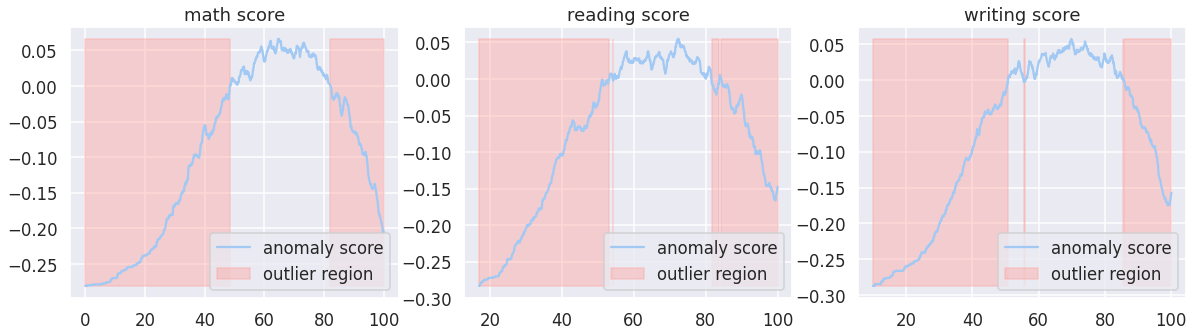

In [57]:
from sklearn.ensemble import IsolationForest
# Ploting the sub plot 
fig , axs = plt. subplots(1, 3, figsize= (20, 5), facecolor = 'w', edgecolor = 'k')
axs = axs.ravel()

for i , column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df_ss[column].values.reshape(-1,1))
    
    col =   np.linspace(df_ss[column].min(), df_ss[column].max(), len(df_ss)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(col)
    outlier = isolation_forest.predict(col)
    
    axs[i].plot(col, anomaly_score, label='anomaly score')
    axs[i].fill_between(col.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.4, label='outlier region')
    
    axs[i].legend()
    axs[i].set_title(column)

In the snippet above, we have trained our IsolationForest using the data generated, computed the anomaly score for each observation, and classified each observation as an outlier or non-outlier. The chart shows the anomaly scores and the regions where the outliers are. As expected, the anomaly score reflects the shape of the underlying distribution and the outlier regions correspond to low probability areas.

### B) Mulitivariate Outliers:

### 1) DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.

Let’s cover some important concepts. DBScan has three important concepts:

- Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP) is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is 'eps'. 'eps' is the maximum distance between two samples for them to be considered as in the same cluster.

- Border Points are in the same cluster as core points but much further away from the centre of the cluster.

- Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. 

In [58]:
# Again using insurence dataset and choosing age and bmi column
X = df_z[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [59]:
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

Here the -1's represent the outliers!

Let's plot to differentiate the outliers. I'll set the blue colour to normal records and red colour to outliers.

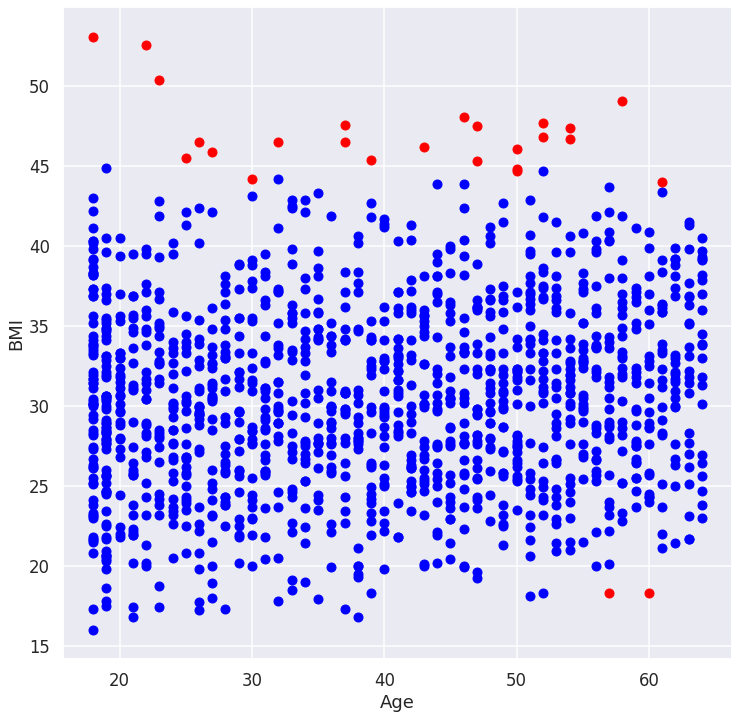

In [60]:
plt.figure(figsize = (12,12))

unique_labels = set(labels)
colors = ['blue', 'red']
for color , label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color)
plt.xlabel('Age');
plt.ylabel('BMI');

### 2) Local Outlier Factor Method(LOF):

LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.

This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points.

A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.

In [61]:
# Again Using heart diseases dataset for multivarite analysis 

clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df[['age','chol']].values
y_pred = clf.fit_predict(X)

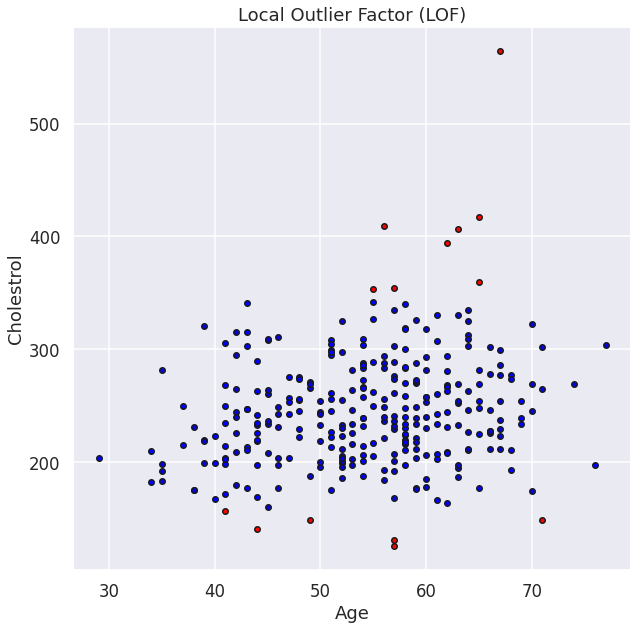

In [63]:
plt.figure(figsize=(10,10))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

Please ignore if there is some mistakes. I can improve myself further. I am quick learner. Few things still i dint get properly in Isolation Forest But InShaAllah I can do it. For Now i just review the stomp library. I also can work with that. 

## Regards:
Muhammad Danya Wajid